# Ejemplo 5, clasificacion de imagenes  y comparación de 2 redes neuronales

Data:
* https://www.tensorflow.org/datasets/catalog/fashion_mnist
* https://keras.io/api/datasets/fashion_mnist/

# Maquina de red neuronal  sencilla (feedforward) 
(Sequential - Dense)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
'''
fashion_mnist es un conjunto de datos de imágenes de ropa y accesorios,
similar al conjunto de datos MNIST, pero en lugar de dígitos, contiene imágenes
de ropa y accesorios. El conjunto de datos fue creado por Zalando SE y se encuentra
bajo la licencia MIT.
'''

#Cargar Set de Datos
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

'''
X_train y X_test son matrices de NumPy que contienen las imágenes de ropa y accesorios,
con forma (60000, 28, 28) y (10000, 28, 28), respectivamente.

Cada imagen es una matriz de 28x28 píxeles, con valores que van de 0 a 255.
y_train y y_test son matrices de NumPy que contienen las etiquetas correspondientes
a cada imagen, con forma (60000,) y (10000,), respectivamente. 

Las etiquetas son enteros que van de 0 a 9, cada uno correspondiente a una categoría
de ropa o accesorio.

'''
print(X_train[1])
print(len(X_train))

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

Se esta trabajando con un conjunto de datos ya vectorizado y escalado en escala de gris, existen maneras genericas de vectorizar una imagen, como por ejemplo:


In [2]:
'''
# Vectorizacion de las imagenes

from keras.preprocessing.image import array_to_img, img_to_array, load_img

import os

for fname in os.listdir('imagen'):
    print fname
'''

# convertir rgb a gray_scale https://e2eml.school/convert_rgb_to_grayscale
# convierte cada pixel de la imagen a su rrespectivo valor de color entre 0 y 255



"\n# Vectorizacion de las imagenes\n\nfrom keras.preprocessing.image import array_to_img, img_to_array, load_img\n\nimport os\n\nfor fname in os.listdir('imagen'):\n    print fname\n"

In [2]:
#Normalizacion de Imagenes
X_train = X_train / 255.0
X_test = X_test / 255.0
# al dividir por 255 que es el maximo, estoy escalando entre 0 y 1

#Reformar Datos (lo paso a 2 dimensiones, donde tengo:  # de lineas, la data completa)
X_train = X_train.reshape(-1, 28*28)
print(X_train.shape)

X_test = X_test.reshape(-1, 28*28)


(60000, 784)


In [4]:
# CREANDO RED NEURONAL
#Definir Modelo
model = tf.keras.models.Sequential()

#Primera Capa
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))
# recordemos que el input son las variables, si tengo una matriz 28x28 =784

#Segunda Capa
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

#Capa Desercion
model.add(tf.keras.layers.Dropout(0.2))

En una red neuronal, una capa de deserción (también conocida como Dropout) es una técnica de regularización que se utiliza para prevenir el sobreajuste (overfitting) de la red neuronal. El sobreajuste ocurre cuando la red neuronal se ajusta demasiado bien a los datos de entrenamiento y no generaliza bien a nuevos datos.

La capa de deserción funciona "desactivando" aleatoriamente una fracción de las neuronas de la capa durante el entrenamiento. Esto significa que, en cada iteración de entrenamiento, algunas neuronas no participan en la propagación de la señal y no se actualizan sus pesos. De esta manera, la red neuronal no se ajusta demasiado a los datos de entrenamiento y se vuelve más robusta y generalizable.

0.2 es el parámetro de deserción, es decir que este caso el 20% de las neuronas se desactivarán.
Durante el entrenamiento, el 20% de las neuronas de la capa anterior se desactivarán aleatoriamente. Esto significa que, en cada iteración de entrenamiento, solo el 80% de las neuronas participarán en la propagación de la señal y se actualizarán sus pesos.



In [5]:
#Capa OutPut
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

En la capa de salida tenemos 10 neuronas, lo que significa que
tenemos 10 salidas!!, recordando que este clasificador de prendas de vestir tiene
10 clasificaciones

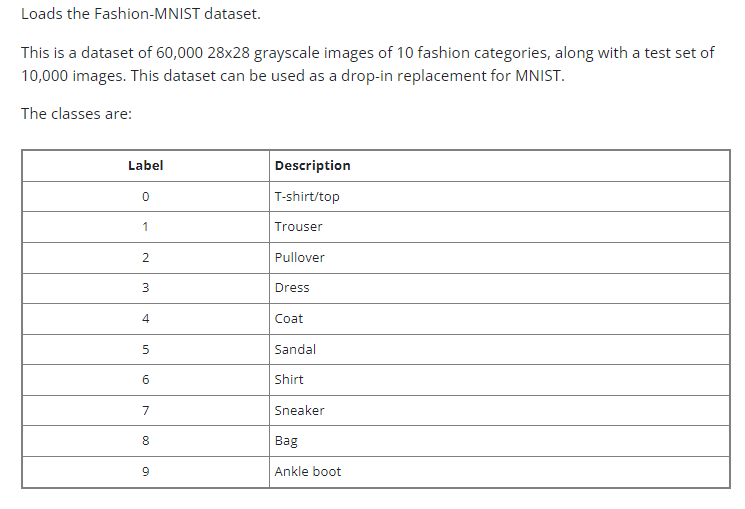

In [6]:
#COMPILADO
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',\
              metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#ENTRENANDO MODELO
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6708 - sparse_categorical_accuracy: 0.7653
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3940 - sparse_categorical_accuracy: 0.8570
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3537 - sparse_categorical_accuracy: 0.8688
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3329 - sparse_categorical_accuracy: 0.8772
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3116 - sparse_categorical_accuracy: 0.8848
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3026 - sparse_categorical_accuracy: 0.8882
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2827 - sparse_categorical_accuracy: 0.8951
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2747 - sparse_categorical_accuracy: 0.8968
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2663 - sparse_categorical_accuracy: 0.9008
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━

In [8]:
#EVALUANDO MODELO
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.3334 - sparse_categorical_accuracy: 0.8810


# Diferencia entre tipos de redes neuronales

Las redes neuronales sencillas, también conocidas como redes neuronales feedforward o completamente conectadas, y las redes neuronales convolucionales (CNNs), son dos tipos de arquitecturas de redes neuronales que se utilizan en diferentes contextos y para distintos tipos de tareas. 

Las diferencias clave entre ambas son:

### Redes Neuronales Sencillas (Dense o Fully Connected Layers -> feedforward)

1. Estructura:

    * Una red neuronal sencilla está compuesta por capas completamente conectadas (fully connected layers), donde cada neurona en una capa está conectada a todas las neuronas de la siguiente capa. En Keras, estas capas se definen con Dense().

2. Operación:

    * Cada neurona realiza una combinación lineal de sus entradas, aplica una función de activación y pasa el resultado a la siguiente capa.

3. Uso Principal:

    * Se usan generalmente para problemas donde los datos de entrada tienen una estructura plana (es decir, no tienen relaciones espaciales específicas), como datos tabulares.

    * Son muy comunes en problemas de clasificación y regresión donde los datos no tienen una estructura espacial o temporal significativa.

4. Limitaciones:

    * No capturan bien las dependencias espaciales locales en los datos, como en imágenes, donde la relación entre los píxeles cercanos es importante.

    * No son escalables para entradas de alta dimensión, ya que el número de parámetros puede crecer muy rápidamente.
    
    
### Redes Neuronales Convolucionales (Conv2D -> CNNs)

1. Estructura:

    * Una red neuronal convolucional utiliza capas convolucionales, donde cada neurona solo está conectada a una pequeña región de la capa anterior. En Keras, estas capas se definen con Conv2D().

    * Además de las capas convolucionales, las CNNs suelen tener capas de agrupamiento (pooling) y capas completamente conectadas al final.

2. Operación:

    * Las capas convolucionales aplican filtros (kernels) que recorren la imagen (o la entrada con estructura espacial), realizando operaciones de convolución que permiten detectar características locales como bordes, texturas, etc.

    * Después de las operaciones de convolución, generalmente se aplican funciones de activación y capas de agrupamiento (pooling) que reducen la dimensionalidad.

3. Uso Principal:

    * Son ideales para problemas donde los datos tienen una estructura espacial o temporal significativa, como imágenes, videos, y datos de series temporales.

    * Son muy efectivas para tareas de visión por computadora como clasificación de imágenes, detección de objetos, y segmentación de imágenes.

4. Ventajas:

    * Capturan las relaciones espaciales locales en los datos.
    * Tienen menos parámetros que una red completamente conectada equivalente debido a la compartición de pesos, lo que las hace más eficientes y menos propensas al sobreajuste.

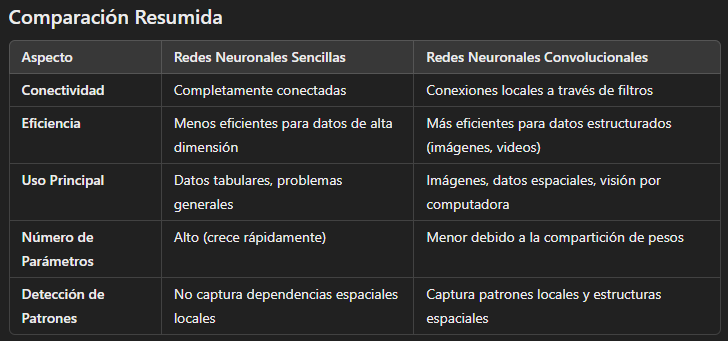

En resumen, mientras que las redes neuronales sencillas son versátiles y pueden aplicarse a una amplia variedad de problemas, las redes neuronales convolucionales son especializadas y particularmente efectivas para tareas que involucran datos con una estructura espacial significativa, como las imágenes.

### Que es la convolucion?

https://www.codificandobits.com/blog/convolucion-redes-convolucionales/


# Maquina de red neuronal  Convolucional (CNNs)
(sequential - Conv2D)

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt



#Cargar Set de Datos
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#Normalizacion de Imagenes
X_train = X_train / 255.0
X_test = X_test / 255.0

#Reformar Datos
#X_train = X_train.reshape(-1, 28*28)
print(X_train.shape)

#X_test = X_test.reshape(-1, 28*28)
print(X_test.shape)

#CREANDO RED NEURONAL CONVOLUCIONAL
model = tf.keras.models.Sequential()

#Primera Capa
model.add(tf.keras.layers.Conv2D(filters=28, kernel_size=3, padding="same",\
                                 activation="relu", input_shape=[28,28,1]))




(60000, 28, 28)
(10000, 28, 28)


In [36]:
#Segunda Capa

#se añaden una capa convolucional seguida de una capa de agrupamiento (pooling) a un modelo
model.add(tf.keras.layers.Conv2D(filters=28, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


## Conv2D:

Esta capa aplica una operación de convolución 2D a la entrada, lo que permite a la red aprender filtros que pueden detectar características locales como bordes, texturas, y otros patrones espaciales en una imagen.

* Parámetros:

    * filters=28: Esta especificación indica que la capa convolucional aplicará 28 filtros distintos a la entrada. Cada filtro aprende a detectar diferentes características.
    * kernel_size=3: El tamaño del filtro (o kernel) es de 3x3 píxeles. Esto significa que cada filtro recorrerá la imagen en ventanas de 3x3 píxeles.
    * padding="same": Este parámetro indica que se debe aplicar un padding de forma que la salida tenga el mismo tamaño espacial que la entrada. Se agregan ceros alrededor de los bordes de la entrada cuando sea necesario.
    * activation="relu": Esta especificación indica que la función de activación ReLU (Rectified Linear Unit) se aplicará después de la convolución. 

### MaxPool2D:

Esta capa aplica una operación de agrupamiento máximo (max pooling) a la salida de la capa convolucional. Max pooling reduce las dimensiones espaciales (ancho y alto) de la entrada, manteniendo solo el valor máximo de cada ventana de pooling.

* Parámetros:

    * pool_size=2: El tamaño de la ventana de pooling es de 2x2 píxeles. Esto significa que se considerarán bloques de 2x2 píxeles de la entrada y se seleccionará el valor máximo de cada bloque.
    * strides=2: Este parámetro especifica que la ventana de pooling se moverá 2 píxeles a la vez tanto en la dirección horizontal como vertical. Esto asegura que las ventanas no se solapen.
    * padding='valid': Este parámetro indica que no se aplicará padding a la entrada antes de la operación de pooling, lo que puede resultar en una reducción en el tamaño espacial de la salida.

* Propósito:

    * La capa de max pooling (MaxPool2D) reduce la dimensionalidad espacial de la salida de la capa convolucional, lo que ayuda a disminuir el número de parámetros y la carga computacional en las capas posteriores.
    * Max pooling también introduce una forma de invariancia a pequeñas traslaciones y distorsiones en la imagen, haciendo que la red sea más robusta a cambios en la posición y orientación de las características detectadas.
    * Al reducir las dimensiones espaciales, la capa de pooling también ayuda a consolidar las características más importantes detectadas por los filtros de la capa convolucional, permitiendo una representación más compacta de la información.

### Resumen:
Conv2D: Extrae características locales de la imagen mediante la aplicación de múltiples filtros de convolución.
MaxPool2D: Reduce las dimensiones espaciales de la imagen y consolida las características más importantes, ayudando a la red a ser más eficiente y robusta.

In [37]:
#Tercera Capa
model.add(tf.keras.layers.Conv2D(filters=56, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

#Cuarta Capa
model.add(tf.keras.layers.Conv2D(filters=56, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

#Aplanado
model.add(tf.keras.layers.Flatten())



### Flatten()
La capa Flatten transforma una entrada multidimensional en un vector unidimensional.

* Función Principal: La capa Flatten transforma una entrada multidimensional en un vector unidimensional.

* Propósito: Facilitar la conexión entre las capas convolucionales/agrupamiento y las capas densas en una red neuronal.

* Uso Típico: Se utiliza justo antes de las capas densas en redes neuronales convolucionales para aplanar la salida de las capas convolucionales y de agrupamiento.

Esta capa es esencial en arquitecturas de redes neuronales convolucionales porque permite la transición de la extracción de características (realizada por las capas convolucionales) a la interpretación y clasificación final (realizada por las capas densas).

** Ejemplo Práctico:

Supongamos que la salida de la última capa convolucional es de tamaño (batch_size, 7, 7, 32). Después de aplicar Flatten, la forma de la salida será (batch_size, 7 * 7 * 32), es decir, (batch_size, 1568).
Esta salida aplanada (vector) puede entonces ser alimentada a una o más capas densas para la clasificación, regresión u otras tareas de predicción.


In [38]:
#Primera Capa Dense
model.add(tf.keras.layers.Dense(units=28*3, activation='relu'))

#Segunda Capa Dense (Output)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


#Compilado
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", \
              metrics=["sparse_categorical_accuracy"])


In [39]:
#Entrenando
model.fit(X_train, y_train, epochs=15)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.6355 - sparse_categorical_accuracy: 0.7705
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.2778 - sparse_categorical_accuracy: 0.9001
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.2308 - sparse_categorical_accuracy: 0.9158
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.2010 - sparse_categorical_accuracy: 0.9266
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.1758 - sparse_categorical_accuracy: 0.9359
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.1583 - sparse_categorical_accuracy: 0.9417
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.1378 - sparse_categorical_accuracy: 0.9489
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.1245 - sparse_categorical_accuracy: 0.9531
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.1149 - sparse_categorical_accuracy: 0.9577
Epoch 10/15
1875/18

In [40]:
#Evaluando Modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3312 - sparse_categorical_accuracy: 0.9174


### conclusión

* Maquina de red neuronal  sencilla (feedforward) 
    * 982us/step - loss: 0.3334 - sparse_categorical_accuracy: 0.8810

* Maquina de red neuronal Convolucional (CNNs)
    * 5ms/step - loss: 0.3312 - sparse_categorical_accuracy: 0.9174
